In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sstats
from glob import glob
import numpy as np

from utils import SimulateData

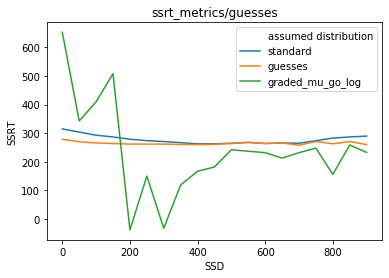

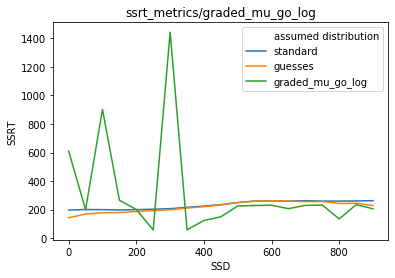

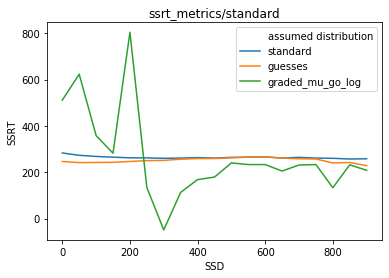

In [2]:
full_metric_df = pd.DataFrame()

full_melt = pd.DataFrame()

for file in glob('ssrt_metrics/*.csv'):
    title = file.split('indiv_')[-1].replace('.csv', '')
    data =  pd.read_csv(file, index_col=0)
    data.columns = data.columns.str.replace('SSRT_', '')
    data = data.rename(columns={'SSRT': 'standard', 'w_guesses': 'guesses', 'w_graded': 'graded_mu_go_log'})
    melt_df = pd.melt(data, id_vars=['SSD'], value_vars=['standard','guesses','graded_mu_go_log'], var_name = 'assumed distribution', value_name='SSRT')
    melt_df['underlying distribution'] = title
    full_melt = pd.concat([full_melt, melt_df], 0)
    
    
    _ = sns.lineplot(x='SSD', y='SSRT', hue='assumed distribution', data=melt_df)
    
    plt.title(title)
    plt.show()
    plt.close()
    
    # for inhibition function
    data['underlying distribution'] = title
    full_metric_df = pd.concat([full_metric_df, data], 0)
#     curr_series = data.loc[:,['mean_SSD', 'p_respond']].set_index('mean_SSD').add_prefix(title+'_')
#     p_respond_df = pd.concat([p_respond_df, curr_series], 1)

# organize ssrt metric data

In [3]:
full_metric_df = pd.DataFrame()

full_melt = pd.DataFrame()

for file in [i for i in glob('ssrt_metrics/*.csv') if 'linear' not in i]:
    title = file.split('/')[-1].replace('.csv', '')
    data =  pd.read_csv(file, index_col=0)
    data.columns = data.columns.str.replace('SSRT_', '')
    data = data.rename(columns={'SSRT': 'standard', 'w_guesses': 'guesses', 'w_graded': 'graded_mu_go_log'})
    melt_df = pd.melt(data, id_vars=['SSD'], value_vars=['standard', 'guesses', 'graded_mu_go_log'], var_name = 'assumed distribution', value_name='SSRT')
    melt_df['underlying distribution'] = title
    full_melt = pd.concat([full_melt, melt_df], 0)
    
    # for inhibition function
    data['underlying distribution'] = title
    full_metric_df = pd.concat([full_metric_df, data], 0)
#     curr_series = data.loc[:,['mean_SSD', 'p_respond']].set_index('mean_SSD').add_prefix(title+'_')
#     p_respond_df = pd.concat([p_respond_df, curr_series], 1)

# SSRT by SSD

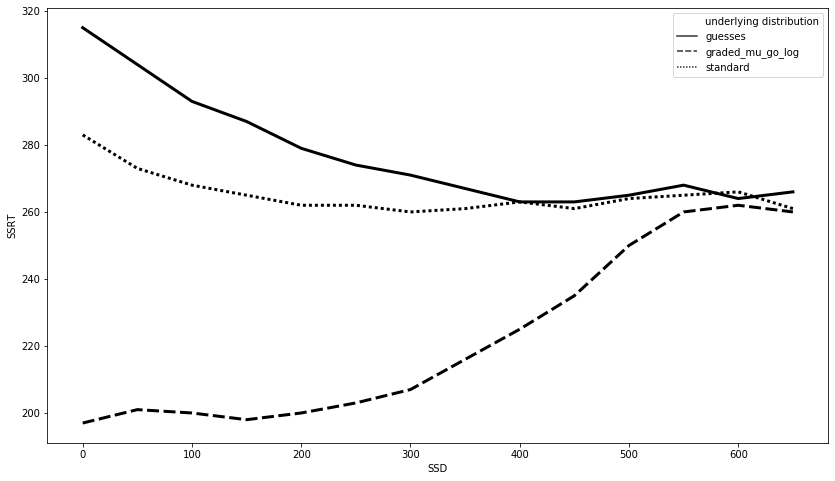

In [4]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
_ = sns.lineplot(x='SSD', y='SSRT', color='k', style='underlying distribution', data=full_melt[(full_melt['assumed distribution'] == 'standard') & (full_melt['SSD'] <= 650)], linewidth=3)
plt.savefig('figures/SSRT_by_SSD.png')

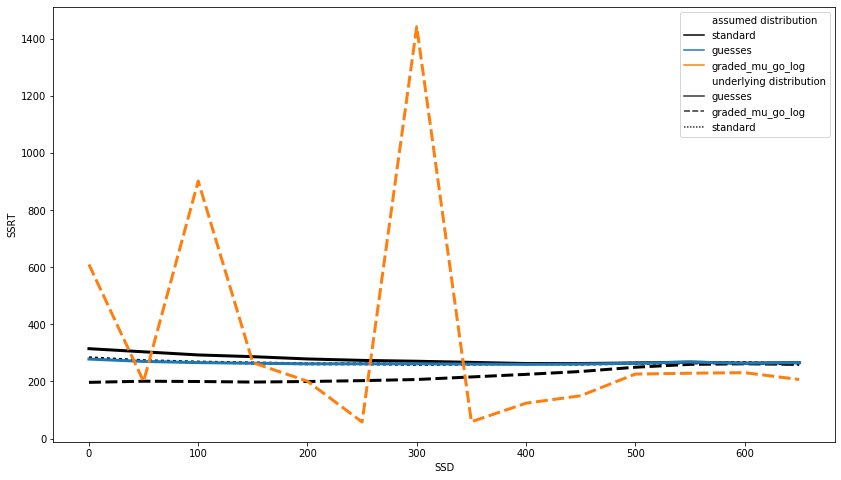

In [5]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
keep_idx = ((full_melt['assumed distribution'] == 'standard') | (full_melt['assumed distribution'] == full_melt['underlying distribution'])) & (full_melt['SSD'] <= 650)
_ = sns.lineplot(x='SSD', y='SSRT', hue='assumed distribution', style='underlying distribution', data=full_melt[keep_idx], palette=['k', '#1f77b4', '#ff7f0e'], linewidth=3)
plt.savefig('figures/SSRT_by_SSD_supplement.png')

In [6]:
full_metric_df[full_metric_df['underlying distribution'] == 'graded_mu_go_log']

,standard,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD,guesses,graded_mu_go_log,underlying distribution
0,197.0,0.0,0.056053,2808.0,455.621347,294.024976,0,0.0,NaN,NaN,0.0,143.267690,610.0,graded_mu_go_log
1,201.0,50.0,0.162640,2808.0,455.621347,296.885063,0,0.0,NaN,NaN,50.0,169.480132,200.0,graded_mu_go_log
2,200.0,100.0,0.279660,2808.0,455.621347,306.795108,0,0.0,NaN,NaN,100.0,177.908100,902.0,graded_mu_go_log
3,198.0,150.0,0.394373,2808.0,455.621347,321.673457,0,0.0,NaN,NaN,150.0,180.000000,266.0,graded_mu_go_log
4,200.0,200.0,0.506013,2808.0,455.621347,336.621314,0,0.0,NaN,NaN,200.0,186.786916,201.0,graded_mu_go_log
5,203.0,250.0,0.604547,2808.0,455.621347,351.563530,0,0.0,NaN,NaN,250.0,193.000000,58.0,graded_mu_go_log
6,207.0,300.0,0.686620,2808.0,455.621347,363.738002,0,0.0,NaN,NaN,300.0,199.000000,1443.0,graded_mu_go_log
7,216.0,350.0,0.757307,2808.0,455.621347,375.024446,0,0.0,NaN,NaN,350.0,211.000000,59.0,graded_mu_go_log
8,225.0,400.0,0.812920,2808.0,455.621347,385.975266,0,0.0,NaN,NaN,400.0,221.000000,124.0,graded_mu_go_log
9,235.0,450.0,0.857120,2808.0,455.621347,393.959578,0,0.0,NaN,NaN,450.0,233.000000,150.0,graded_mu_go_log


In [7]:
full_melt[full_melt['underlying distribution'] == 'graded_mu_go_log']

,SSD,assumed distribution,SSRT,underlying distribution
0,0.0,standard,197.000000,graded_mu_go_log
1,50.0,standard,201.000000,graded_mu_go_log
2,100.0,standard,200.000000,graded_mu_go_log
3,150.0,standard,198.000000,graded_mu_go_log
4,200.0,standard,200.000000,graded_mu_go_log
5,250.0,standard,203.000000,graded_mu_go_log
6,300.0,standard,207.000000,graded_mu_go_log
7,350.0,standard,216.000000,graded_mu_go_log
8,400.0,standard,225.000000,graded_mu_go_log
9,450.0,standard,235.000000,graded_mu_go_log


# Inhibition Function

In [8]:
abcd_inhib_func = pd.read_csv('abcd_data/abcd_inhib_func.csv')

In [9]:
inhib_func_df = pd.concat([full_metric_df[['SSD', 'p_respond', 'underlying distribution']], abcd_inhib_func], 0)

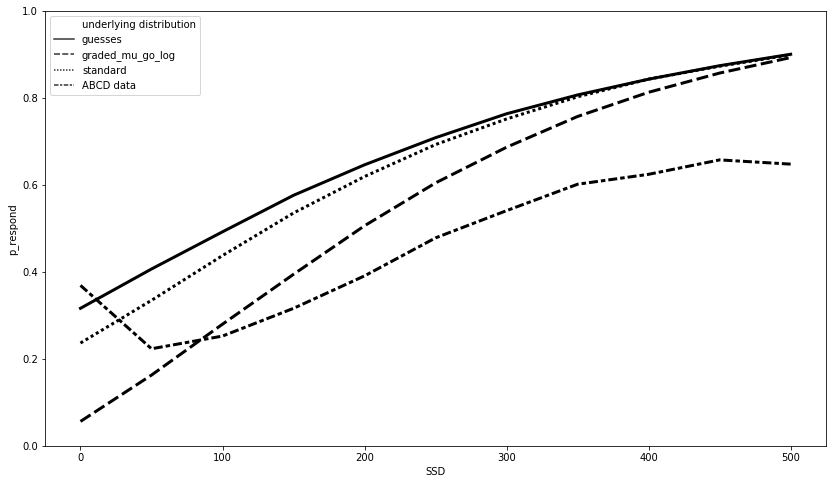

In [10]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
_ = sns.lineplot(x='SSD', y='p_respond', color='k', style='underlying distribution', data=inhib_func_df.query('SSD <= 500'), linewidth=3)
plt.ylim([0,1])
plt.savefig('figures/inhibition_function.png')

# Individual Differences

In [11]:
ABCD_SSD_dists = pd.read_csv('abcd_data/SSD_dist_by_subj.csv')
ABCD_SSD_dists

,NARGUID,SSDDur,proportion
0,003RTV85,300.0,0.250000
1,003RTV85,250.0,0.183333
2,003RTV85,400.0,0.183333
3,003RTV85,350.0,0.166667
4,003RTV85,450.0,0.100000
...,...,...,...
64043,xxmy9wd8,100.0,0.183333
64044,xxmy9wd8,150.0,0.133333
64045,xxmy9wd8,200.0,0.116667
64046,xxmy9wd8,250.0,0.100000


In [12]:
indiv_SSRTs = pd.DataFrame()
for file in [i for i in glob('ssrt_metrics/*.csv') if 'linear' not in i]:
    data =  pd.read_csv(file, index_col=0)
    
    gen_str = file.split('/')[-1].replace('.csv', '')
    indiv_ssrt_df = pd.DataFrame(np.nan, index=ABCD_SSD_dists.NARGUID.unique(), columns=['vanilla', 'w_guesses', 'w_graded'])
    for sub in ABCD_SSD_dists.NARGUID.unique():
        curr_sub = ABCD_SSD_dists.query("NARGUID=='%s'" % sub)
        indiv_ssrt_df.loc[sub, :] = [0, 0, 0]
        for SSD in curr_sub.SSDDur:
            ssd_SSRTs = data.loc[data.SSD==SSD, ['SSRT', 'SSRT_w_guesses', 'SSRT_w_graded']].values[0]
            weight = curr_sub.loc[curr_sub.SSDDur==SSD, 'proportion'].values
            indiv_ssrt_df.loc[sub, :] +=  ssd_SSRTs * weight
    indiv_SSRTs = pd.concat([indiv_SSRTs, indiv_ssrt_df.add_prefix('gen-%s_SSRT-' % gen_str)], 1)

In [13]:
indiv_SSRTs

,gen-guesses_SSRT-vanilla,gen-guesses_SSRT-w_guesses,gen-guesses_SSRT-w_graded,gen-graded_mu_go_log_SSRT-vanilla,gen-graded_mu_go_log_SSRT-w_guesses,gen-graded_mu_go_log_SSRT-w_graded,gen-standard_SSRT-vanilla,gen-standard_SSRT-w_guesses,gen-standard_SSRT-w_graded
003RTV85,270.466667,261.642059,115.733333,213.000000,205.245816,456.233333,261.800000,253.099556,145.800000
00CY2MDM,300.200000,270.060298,449.233333,199.166667,167.180925,506.483333,272.583333,243.344475,480.366667
00HEV6HB,288.850000,267.613401,286.333333,201.816667,177.013275,564.050000,268.800000,247.833565,318.233333
00LJVZK2,285.100000,266.571296,299.516667,213.583333,193.793808,403.066667,267.500000,249.404808,336.750000
00NPMHND,267.383333,263.575393,212.466667,243.683333,240.119586,224.216667,263.400000,259.510138,223.216667
...,...,...,...,...,...,...,...,...,...
hkfm1ruj,272.450000,262.875151,180.366667,219.866667,211.017670,321.366667,263.483333,254.104001,238.433333
hx1ru4hv,290.116667,266.382861,312.566667,199.883333,177.006423,399.350000,267.750000,244.835161,454.200000
jf8w3pw6,287.200000,265.052620,291.316667,200.683333,181.450848,469.466667,266.033333,244.774454,393.366667
x8k59,283.166667,264.020118,222.116667,202.100000,185.792521,416.766667,264.666667,246.319785,376.300000


In [14]:
indiv_SSRTs.to_csv('outputs/ABCD_weighted_SSRTs.csv')
indiv_SSRTs

,gen-guesses_SSRT-vanilla,gen-guesses_SSRT-w_guesses,gen-guesses_SSRT-w_graded,gen-graded_mu_go_log_SSRT-vanilla,gen-graded_mu_go_log_SSRT-w_guesses,gen-graded_mu_go_log_SSRT-w_graded,gen-standard_SSRT-vanilla,gen-standard_SSRT-w_guesses,gen-standard_SSRT-w_graded
003RTV85,270.466667,261.642059,115.733333,213.000000,205.245816,456.233333,261.800000,253.099556,145.800000
00CY2MDM,300.200000,270.060298,449.233333,199.166667,167.180925,506.483333,272.583333,243.344475,480.366667
00HEV6HB,288.850000,267.613401,286.333333,201.816667,177.013275,564.050000,268.800000,247.833565,318.233333
00LJVZK2,285.100000,266.571296,299.516667,213.583333,193.793808,403.066667,267.500000,249.404808,336.750000
00NPMHND,267.383333,263.575393,212.466667,243.683333,240.119586,224.216667,263.400000,259.510138,223.216667
...,...,...,...,...,...,...,...,...,...
hkfm1ruj,272.450000,262.875151,180.366667,219.866667,211.017670,321.366667,263.483333,254.104001,238.433333
hx1ru4hv,290.116667,266.382861,312.566667,199.883333,177.006423,399.350000,267.750000,244.835161,454.200000
jf8w3pw6,287.200000,265.052620,291.316667,200.683333,181.450848,469.466667,266.033333,244.774454,393.366667
x8k59,283.166667,264.020118,222.116667,202.100000,185.792521,416.766667,264.666667,246.319785,376.300000


In [15]:
indiv_SSRTs.corr().to_csv('outputs/ABCD_weighted_SSRTs_corr.csv')
indiv_SSRTs.corr()

,gen-guesses_SSRT-vanilla,gen-guesses_SSRT-w_guesses,gen-guesses_SSRT-w_graded,gen-graded_mu_go_log_SSRT-vanilla,gen-graded_mu_go_log_SSRT-w_guesses,gen-graded_mu_go_log_SSRT-w_graded,gen-standard_SSRT-vanilla,gen-standard_SSRT-w_guesses,gen-standard_SSRT-w_graded
gen-guesses_SSRT-vanilla,1.000000,0.939313,0.933672,-0.681078,-0.909932,0.515218,0.940866,-0.859723,0.925684
gen-guesses_SSRT-w_guesses,0.939313,1.000000,0.966183,-0.460821,-0.761053,0.419961,0.995011,-0.635397,0.821896
gen-guesses_SSRT-w_graded,0.933672,0.966183,1.000000,-0.432691,-0.732611,0.316082,0.969035,-0.665828,0.857705
gen-graded_mu_go_log_SSRT-vanilla,-0.681078,-0.460821,-0.432691,1.000000,0.919935,-0.687007,-0.497290,0.821077,-0.686582
gen-graded_mu_go_log_SSRT-w_guesses,-0.909932,-0.761053,-0.732611,0.919935,1.000000,-0.672360,-0.782936,0.904825,-0.858003
gen-graded_mu_go_log_SSRT-w_graded,0.515218,0.419961,0.316082,-0.687007,-0.672360,1.000000,0.422636,-0.538554,0.282095
gen-standard_SSRT-vanilla,0.940866,0.995011,0.969035,-0.497290,-0.782936,0.422636,1.000000,-0.637142,0.828130
gen-standard_SSRT-w_guesses,-0.859723,-0.635397,-0.665828,0.821077,0.904825,-0.538554,-0.637142,1.000000,-0.859236
gen-standard_SSRT-w_graded,0.925684,0.821896,0.857705,-0.686582,-0.858003,0.282095,0.828130,-0.859236,1.000000


In [16]:
indiv_SSRTs.corr(method='spearman').to_csv('outputs/ABCD_weighted_SSRTs_rank-corr.csv')
indiv_SSRTs.corr(method='spearman')

,gen-guesses_SSRT-vanilla,gen-guesses_SSRT-w_guesses,gen-guesses_SSRT-w_graded,gen-graded_mu_go_log_SSRT-vanilla,gen-graded_mu_go_log_SSRT-w_guesses,gen-graded_mu_go_log_SSRT-w_graded,gen-standard_SSRT-vanilla,gen-standard_SSRT-w_guesses,gen-standard_SSRT-w_graded
gen-guesses_SSRT-vanilla,1.000000,0.880506,0.809501,-0.927166,-0.965986,0.504339,0.862452,-0.962898,0.938451
gen-guesses_SSRT-w_guesses,0.880506,1.000000,0.934579,-0.754073,-0.813677,0.330710,0.968732,-0.786884,0.892110
gen-guesses_SSRT-w_graded,0.809501,0.934579,1.000000,-0.672280,-0.729289,0.168513,0.951735,-0.737523,0.844919
gen-graded_mu_go_log_SSRT-vanilla,-0.927166,-0.754073,-0.672280,1.000000,0.981790,-0.540919,-0.760244,0.931911,-0.899614
gen-graded_mu_go_log_SSRT-w_guesses,-0.965986,-0.813677,-0.729289,0.981790,1.000000,-0.565445,-0.819980,0.938068,-0.914674
gen-graded_mu_go_log_SSRT-w_graded,0.504339,0.330710,0.168513,-0.540919,-0.565445,1.000000,0.275230,-0.468447,0.261942
gen-standard_SSRT-vanilla,0.862452,0.968732,0.951735,-0.760244,-0.819980,0.275230,1.000000,-0.763666,0.895592
gen-standard_SSRT-w_guesses,-0.962898,-0.786884,-0.737523,0.931911,0.938068,-0.468447,-0.763666,1.000000,-0.906455
gen-standard_SSRT-w_graded,0.938451,0.892110,0.844919,-0.899614,-0.914674,0.261942,0.895592,-0.906455,1.000000


In [17]:
indiv_SSRTs.filter(regex='SSRT-vanilla').corr(method='spearman')

,gen-guesses_SSRT-vanilla,gen-graded_mu_go_log_SSRT-vanilla,gen-standard_SSRT-vanilla
gen-guesses_SSRT-vanilla,1.000000,-0.927166,0.862452
gen-graded_mu_go_log_SSRT-vanilla,-0.927166,1.000000,-0.760244
gen-standard_SSRT-vanilla,0.862452,-0.760244,1.000000


# Plot graded Mu Go function

In [18]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_mu_go(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/utils.py:268: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


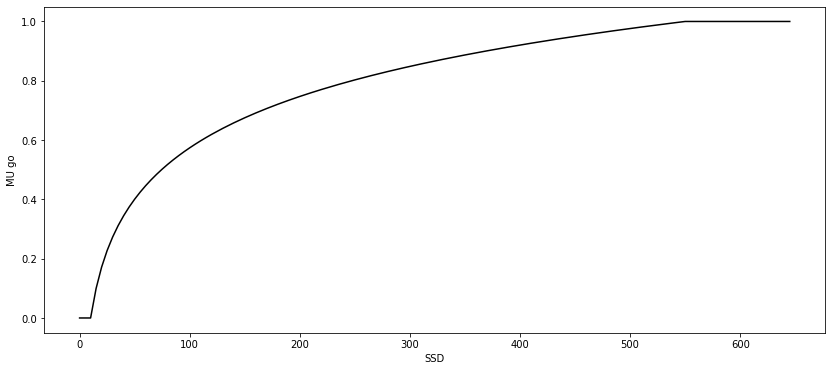

In [19]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')